<a href="https://colab.research.google.com/github/Hassan-jr/Tensorflow-Deep-Learning/blob/main/transfer_learning_part2_fine_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download helper function

In [11]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-03-06 09:31:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-06 09:31:51 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [12]:
from helper_functions import create_tensorboard_callback, unzip_data, plot_loss_curves, walk_through_dir

# Get The data

In [13]:
## Download and unzip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-03-06 09:31:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.1MB/s    in 8.3s    

2023-03-06 09:32:01 (19.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [14]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

## Prepare The data

In [15]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [16]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [17]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [18]:
train_data.element_spec


(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [19]:
for images, labels in train_data.take(1):
  print(images,labels)

tf.Tensor(
[[[[7.60758896e+01 3.90758934e+01 1.20758924e+01]
   [8.14027481e+01 4.44027443e+01 1.74027424e+01]
   [8.27410736e+01 4.57410736e+01 1.67410717e+01]
   ...
   [5.87366066e+01 2.37366066e+01 4.73660707e+00]
   [5.87366066e+01 2.37366066e+01 4.73660707e+00]
   [5.87366066e+01 2.37366066e+01 4.73660707e+00]]

  [[7.98660736e+01 4.28660698e+01 1.58660717e+01]
   [8.44524918e+01 4.74524879e+01 2.04524879e+01]
   [8.57946472e+01 4.87946434e+01 1.97946434e+01]
   ...
   [5.80000000e+01 2.30000000e+01 4.00000000e+00]
   [5.80000000e+01 2.30000000e+01 4.00000000e+00]
   [5.80000000e+01 2.30000000e+01 4.00000000e+00]]

  [[7.99196396e+01 4.19687500e+01 1.52857141e+01]
   [8.41967545e+01 4.62458572e+01 1.95628185e+01]
   [8.53169632e+01 4.76830368e+01 1.86830349e+01]
   ...
   [5.70000000e+01 2.20000000e+01 3.00000000e+00]
   [5.70000000e+01 2.20000000e+01 3.00000000e+00]
   [5.70000000e+01 2.20000000e+01 3.00000000e+00]]

  ...

  [[7.00000000e+00 3.00000000e+00 0.00000000e+00]
   [7

#  Create Model

In [21]:
import tensorflow as tf
# 1. Base Model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2 Freeze the layers and dont train
base_model.trainable=False

# 3 GET THE INPUTS
inputs = tf.keras.layers.Input(shape=(224,224,3), name="InputLayer")

# 4. Rescale the inputs ..... This is not for all the models like efficinet net
# X = tf.keras.layers.experimental.preprosessing.Rescalling(1/225.) (inputs)

# 5 top layers after the base model layers
x = base_model(inputs)

# 6 pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePoolingLayer")(x)

# 7 output
output = tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")(x)

# 8 CREATE THE MODLE
model_0 = tf.keras.Model(inputs, output)

# 9 COMPILT
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 10 fit
history_0= model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks=[create_tensorboard_callback("transfer_learning", "Feature_extraction")])


Saving TensorBoard log files to: transfer_learning/Feature_extraction/20230306-093355
Epoch 1/5
24/24 [==============================] - 17s 372ms/step - loss: 1.8810 - accuracy: 0.4293 - val_loss: 1.3152 - val_accuracy: 0.7284
Epoch 2/5
24/24 [==============================] - 8s 330ms/step - loss: 1.1022 - accuracy: 0.7520 - val_loss: 0.8794 - val_accuracy: 0.8140
Epoch 3/5
24/24 [==============================] - 8s 337ms/step - loss: 0.7834 - accuracy: 0.8240 - val_loss: 0.7003 - val_accuracy: 0.8484
Epoch 4/5
24/24 [==============================] - 8s 338ms/step - loss: 0.6443 - accuracy: 0.8613 - val_loss: 0.6109 - val_accuracy: 0.8596
Epoch 5/5
24/24 [==============================] - 7s 297ms/step - loss: 0.5490 - accuracy: 0.8707 - val_loss: 0.5554 - val_accuracy: 0.8656


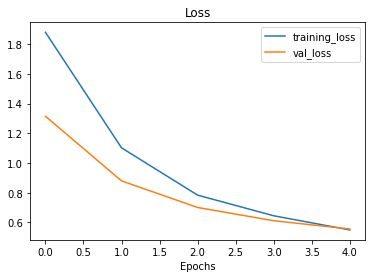

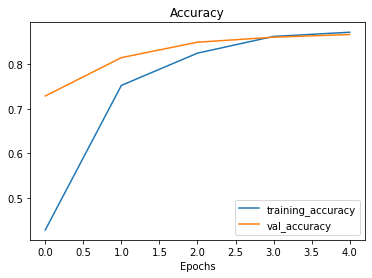

In [22]:
plot_loss_curves(history_0)